# 02. Neural network classicication with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as options ).

* Book version of the course: https://www.learnpytorch.io/02_pytorch_classification/
* All other resources - https://github.com/mrdbourke/pytorch-deep-learning
* Stuck? ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

## 1. Make classification data and get it ready 

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create_circles
X,y = make_circles(n_samples, noise=0.03, random_state = 42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y: \n {y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [5]:
# Make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


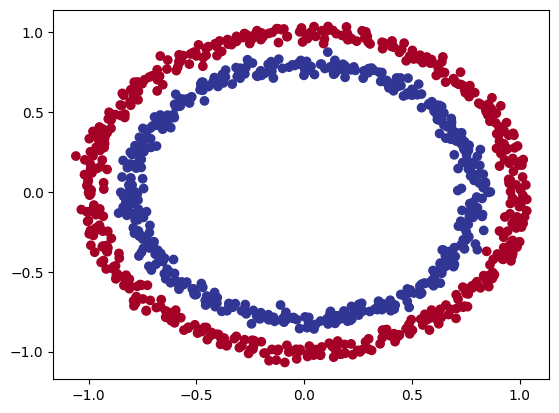

In [6]:
# Visaulize, visualize, visualize 
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note:** The data were working with is referrd to as a toy dataset, a dataset that is small enough to experiment but still siziable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


 ### 1.2 Turn data into tensors and create a train and test split

In [10]:
import torch
torch.__version__

'2.0.1+cpu'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [14]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test), n_samples

(800, 200, 800, 200, 1000)

## 2. Building a model

Lets build a model to classify our blue and red dots

To do so we want to :
1. Setup device agostic code so our code will run on an acclerator
2. Construct a model (by subclassing 'nn.Module')
3. Define a loss function and an optimizer 
4. Create a training and test loop 


In [16]:
# Import Pytorch and nn
import torch
from torch import nn

#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [17]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, lets create a model that:

1. Subclasses 'nn.Module'
2. Create two 'nn.Linear()' layers that are capable of handling the shapes of our data 
3. Define a 'forward()' method 
4. Instantiate an instance of our model class and send it to the target'device'

In [18]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handelling the shapes of our data
        self.layer_1 = nn.Linear(in_features = 2, out_features= 5)
        self.layer_2 = nn.Linear(in_features = 5, out_features= 1)

    # 3. Define a forward method
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2
    
# 4. Instantiate an instance of our model class and send it to our target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
device

'cpu'

A Playground to play around with neural network classification data : https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.47363&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [20]:
# Lets replicate the model using nn.Sequential()
model_0 = nn.Sequential( 
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0788,  0.3887],
                      [ 0.6509, -0.2829],
                      [ 0.1158,  0.5034],
                      [-0.6553,  0.6057],
                      [ 0.6939,  0.1933]])),
             ('0.bias', tensor([-0.1487,  0.6430, -0.3812,  0.2830, -0.6201])),
             ('1.weight',
              tensor([[-0.3004, -0.1661,  0.3214, -0.3241,  0.0461]])),
             ('1.bias', tensor([0.2116]))])

In [22]:
# Make predictions 
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[-0.2324],
        [-0.1819],
        [-0.2018],
        [-0.2418],
        [ 0.0570],
        [ 0.0858],
        [ 0.0229],
        [ 0.0863],
        [-0.2128],
        [-0.1757]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

It is problem specific. 

For regression we might want to use MAE or MSE 

For classification we need binary cross entropy or categorical cross entropy

to understand binary cross entropy : https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

And for optimizers two of the most common are SGD and Adam, however PyTorch has many built in options.

* For the loss function we're going to use 'torch.nn.BCEWithLogitsLoss()'


In [23]:
# Setup the loss function 
# loss_fn = nn.BCELoss() #requires inputs to have gone through the sigmoid activation function prior to the input of BCE loss
loss_fn = nn.BCEWithLogitsLoss() # had the sigmoid activation function built in 

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [24]:
# calculate accuracy - out of 100 what percentage does our model get right?
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) *100
    return(acc)

## 3. Training the model

### 3.1 Going from raw logits -> prediction probability -> prediction labels

Our model outputs are going to be raw **Logits**

We can convert these **Logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary cross entropy and sofrmax for multiclass classification )

Then we can convert our models prediction probabilities to **prediction labels** by either rounding them or taking the 'argmax()'

In [25]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2324],
        [-0.1819],
        [-0.2018],
        [-0.2418],
        [ 0.0570]])

In [26]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [27]:
# Use the sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4422],
        [0.4546],
        [0.4497],
        [0.4398],
        [0.5142]])

For our prediction probability values, we need to perform a range style rounding on them:
* 'y_pred_probs' >= 0.5 , 'y=1' (class 1)
* 'y_pred_probs' <0.5, 'y=0' (class 0)

In [28]:
# Find the prediction labels
y_pred = torch.round(y_pred_probs)

#In full - one line
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_pred.squeeze(),y_pred_labels.squeeze()))

# to get rid of extra dimension
y_pred.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 1.])

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [30]:
torch.manual_seed(42)

# Set the number of epochs
epochs =100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    # Training
    model_0.train()
    
    #Forward_pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred_probs -> pred labels
    
    #calculate loss/accuracy
    loss = loss_fn(y_logits,y_train)    #nn.BCEWithLogitLoss expects raw logits as inputs 
    # loss = loss_fn(torch.sigmoid(y_logits),y_train)  #nn.BCELoss expects prediction probabiity as input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Loss backward
    loss.backward()
    
    #Optimizer step (gradient decent)
    optimizer.step()
    
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #calcu;ate test loss
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_fn(y_true=y_test, y_pred = test_pred)
    
    if epoch%10==0:
        print(f"Epoch: {epoch} | loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | loss: 0.69676, Acc: 48.88 | Test loss: 0.69643, Test acc: 45.50%
Epoch: 10 | loss: 0.69518, Acc: 49.75 | Test loss: 0.69497, Test acc: 45.00%
Epoch: 20 | loss: 0.69438, Acc: 49.88 | Test loss: 0.69431, Test acc: 46.50%
Epoch: 30 | loss: 0.69392, Acc: 50.25 | Test loss: 0.69399, Test acc: 45.50%
Epoch: 40 | loss: 0.69362, Acc: 50.00 | Test loss: 0.69384, Test acc: 49.50%
Epoch: 50 | loss: 0.69343, Acc: 49.62 | Test loss: 0.69378, Test acc: 49.50%
Epoch: 60 | loss: 0.69329, Acc: 49.38 | Test loss: 0.69378, Test acc: 50.00%
Epoch: 70 | loss: 0.69320, Acc: 49.62 | Test loss: 0.69380, Test acc: 50.00%
Epoch: 80 | loss: 0.69314, Acc: 49.50 | Test loss: 0.69384, Test acc: 49.00%
Epoch: 90 | loss: 0.69310, Acc: 49.75 | Test loss: 0.69388, Test acc: 49.50%


## 4. Make Predictions and evaluate the model

From the metrics it looks like our model isnt learning anything

So to inspect it lets make some predictions and make them visual.

To do so, were going to import a function called 'plot_decision_boundary()' - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb


In [31]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


c:\Users\USER\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\USER\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


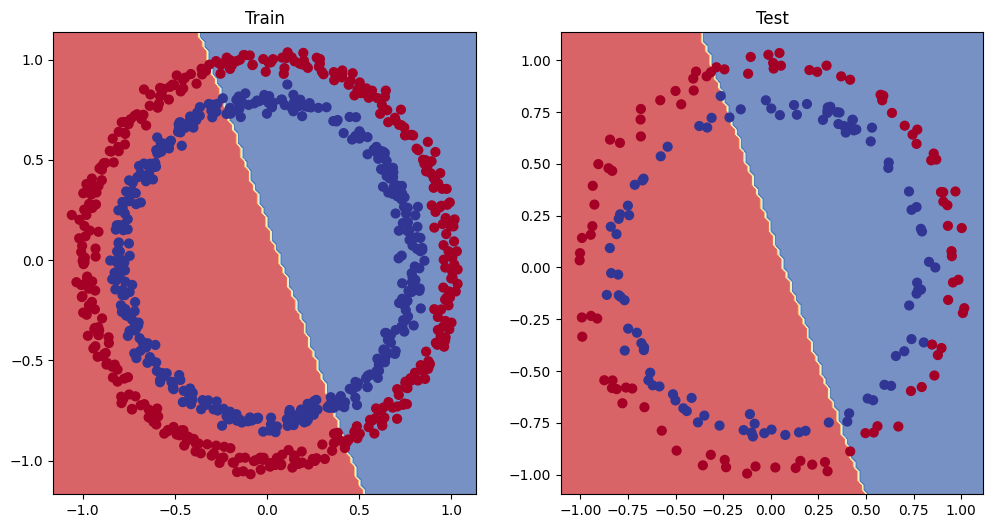

In [32]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from model perspective)

* Add more layers
* Add more hidden units
* Fitting for longer (more epochs)
* Changing the activation functions
* Change the learning rate
* Change the loss function
* Use transfer learning

These options are all from a models perspective, beacuse they deal directly with the model, rather than the data.

And beacuse these options are all values we (machine learning engineers and data scientists) can change, they are refferred as **hyperparameters**.

Lets try and improve our model by :
* Adding more hidden unist: 5-> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs 100 -> 1000


In [33]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features = 10, out_features=10)
        self.layer_3 = nn.Linear(in_features= 10,out_features= 1)

    def forward(self,x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))
        # this way of writing operations leverages speedups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
#Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [35]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Train for longer
epochs = 1000

# Put data on target_device 
X_train,y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # Training 
    model_1.train()
    #Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
    #optimizer
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    ## Testing
    
    model_1.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred = test_pred)
        
    #Print out whats happening
    if epoch%100==0:
        print(f"Epoch: {epoch} | loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | loss: 0.69305, Acc: 50.38 | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | loss: 0.69299, Acc: 51.12 | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | loss: 0.69298, Acc: 51.62 | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | loss: 0.69298, Acc: 51.12 | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | loss: 0.69298, Acc: 51.00 | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.00%


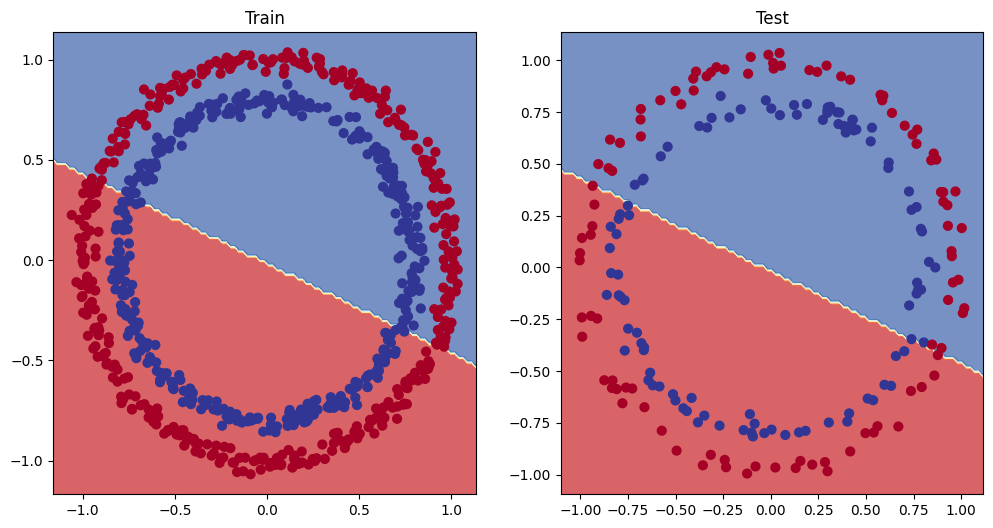

In [36]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if out model can fit a straight line

One way to troubleshoot a larger problem is to test out a smaller problem 


In [37]:
# Create some data: (same as notebook 1)
weight =0.7
bias = 0.3
start = 0
end = 1
step =0.01

#create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias #linear regression 

print(len(X_regression),len(y_regression))
X_regression[:5],y_regression[:5]

100 100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [38]:
# create train and test split
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression , y_test_regression = X_regression[train_split:], y_regression[train_split:]
len(X_train_regression),len(y_train_regression),len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

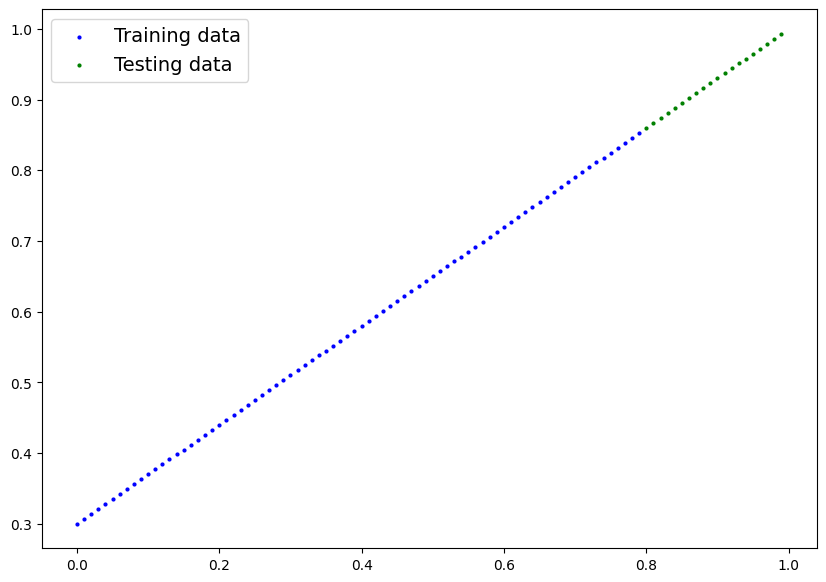

In [39]:
plot_predictions(train_data=X_train_regression,train_labels=y_train_regression,test_data=X_test_regression,test_labels=y_test_regression)

### 5.2 Adjusting 'model_1' to fit a straight line

In [40]:
# Same architecture as model_1 but we are going to use nn.sequential()
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear( in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
#Loss
loss_fn = nn.L1Loss()
#optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [42]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

#Put the data on the target_device 
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression , y_test_regression = X_test_regression.to(device) , y_test_regression.to(device)

#Training
for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        
    # Print out whats happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | loss: {loss:.5f}, Test loss: {test_loss:.5f}")
    

Epoch: 0 | loss: 0.75986, Test loss: 0.91103
Epoch: 100 | loss: 0.02858, Test loss: 0.00081
Epoch: 200 | loss: 0.02533, Test loss: 0.00209
Epoch: 300 | loss: 0.02137, Test loss: 0.00305
Epoch: 400 | loss: 0.01964, Test loss: 0.00341
Epoch: 500 | loss: 0.01940, Test loss: 0.00387
Epoch: 600 | loss: 0.01903, Test loss: 0.00379
Epoch: 700 | loss: 0.01878, Test loss: 0.00381
Epoch: 800 | loss: 0.01840, Test loss: 0.00329
Epoch: 900 | loss: 0.01798, Test loss: 0.00360


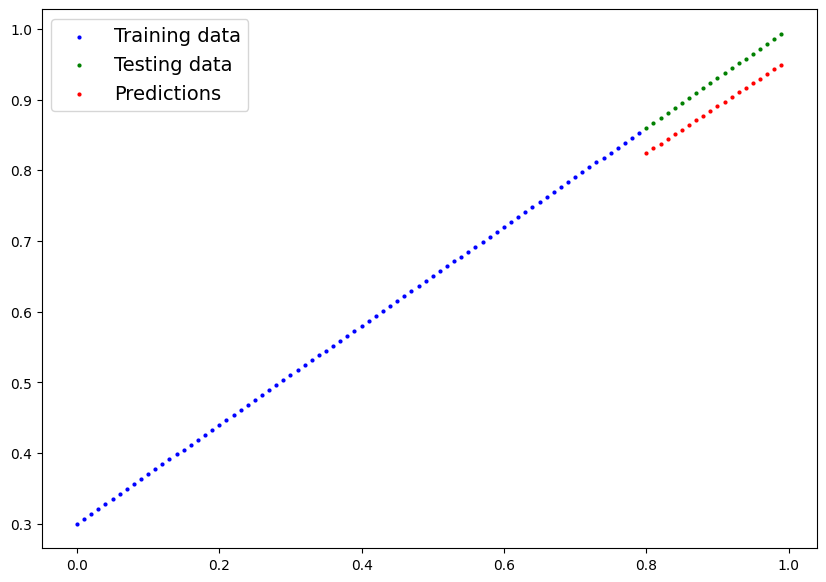

In [43]:
# Turning on evaluation mode
model_2.eval()

#Make predictions
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
    
#PLot data and predictions
plot_predictions(train_data=X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression,
                 predictions = y_preds
                 )

## 6. The missing piece: Non-linearity

"What patterns can you draw if you were given an ifinite amount of straight and non-straight lines"

Or in machine learning terms, an infinite(but really finite) of linear and non-linear functions


### 6.1 recrating non-linear data (red and blue circles)

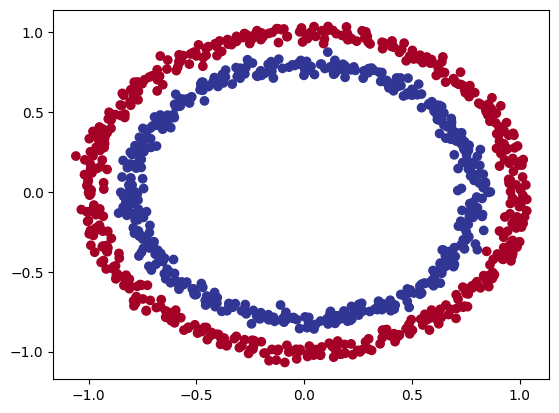

In [44]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y, cmap = plt.cm.RdYlBu)

In [45]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#Split data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear - straight lines
* non-linear - non straight lines

Artificial neural networks are a large combination of linear(straight) and non-straight(non-linear) functions which are potentially able to find patterns in data.

In [46]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features= 10, out_features=1)
        self.relu = nn.ReLU() # non-linear activation function
        
    def forward(self,x):
        #Where should we put out non-linear activation function
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [47]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

## 6.3 Training with non-linearity

In [48]:
# Random_seeds 
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

#Loop through the data
for epoch in range(epochs):
    model_3.train()
    
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred = y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    #testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred = test_pred)
        
    # Print whats happening 
    if epoch%100==0:
        print(f"Epoch: {epoch} | loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | loss: 0.69295, Acc: 50.00 | Test loss: 0.69319, Test acc: 50.00%
Epoch: 100 | loss: 0.69115, Acc: 52.88 | Test loss: 0.69102, Test acc: 52.50%
Epoch: 200 | loss: 0.68977, Acc: 53.37 | Test loss: 0.68940, Test acc: 55.00%
Epoch: 300 | loss: 0.68795, Acc: 53.00 | Test loss: 0.68723, Test acc: 56.00%
Epoch: 400 | loss: 0.68517, Acc: 52.75 | Test loss: 0.68411, Test acc: 56.50%
Epoch: 500 | loss: 0.68102, Acc: 52.75 | Test loss: 0.67941, Test acc: 56.50%
Epoch: 600 | loss: 0.67515, Acc: 54.50 | Test loss: 0.67285, Test acc: 56.00%
Epoch: 700 | loss: 0.66659, Acc: 58.38 | Test loss: 0.66322, Test acc: 59.00%
Epoch: 800 | loss: 0.65160, Acc: 64.00 | Test loss: 0.64757, Test acc: 67.50%
Epoch: 900 | loss: 0.62362, Acc: 74.00 | Test loss: 0.62145, Test acc: 79.00%


### 6.4 Evaluationg a model with non-linear activation functions 

In [49]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
    
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

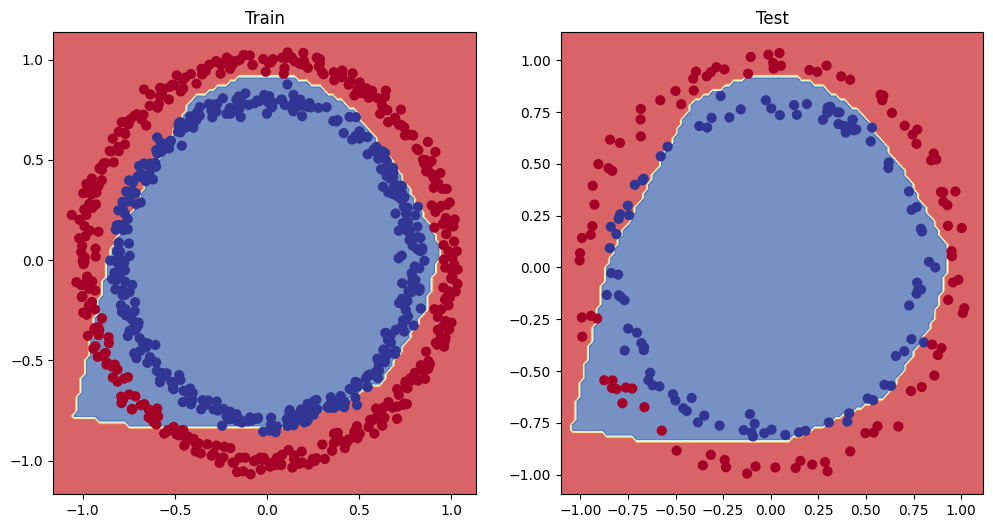

In [50]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non linear activation functions

Neural Networks, rather than us telling the model what to learn, we give it the tools to discover the patterns in data and it tries to figure out the figure out the patterns on its own.

And these tools are linear and non-linear functions

In [51]:
# Create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)
A, A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

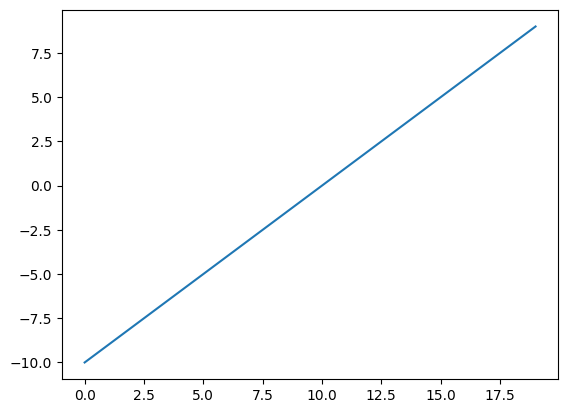

In [52]:
# Visualize the tensor
plt.plot(A)

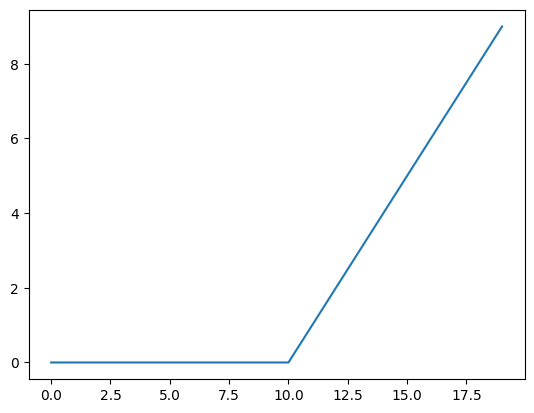

In [53]:
plt.plot(torch.relu(A))

In [54]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0),x) # Inputs muct be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

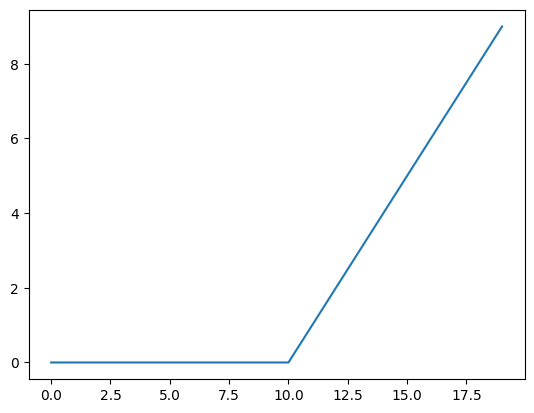

In [55]:
# Plot Relu activation function 
plt.plot(relu(A))

In [56]:
# Now lets do the same for sigmoid : https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html
def sigmoid(x):
    return 1/(1+torch.exp(-x))

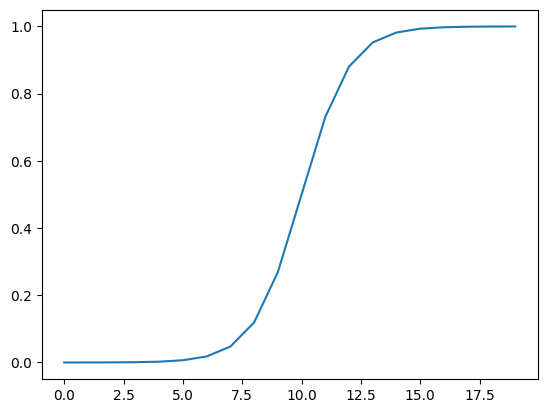

In [57]:
plt.plot(torch.sigmoid(A))

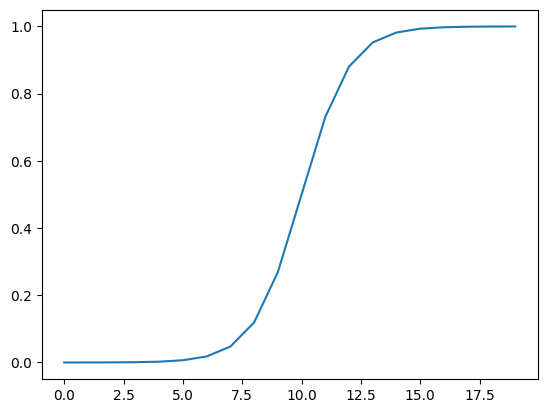

In [58]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multiclass classification problem

* Binary classification = one thing or another (cat v/s dog, spam v/s not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken etc..)

### 8.1 Creating a toy multiclass dataset

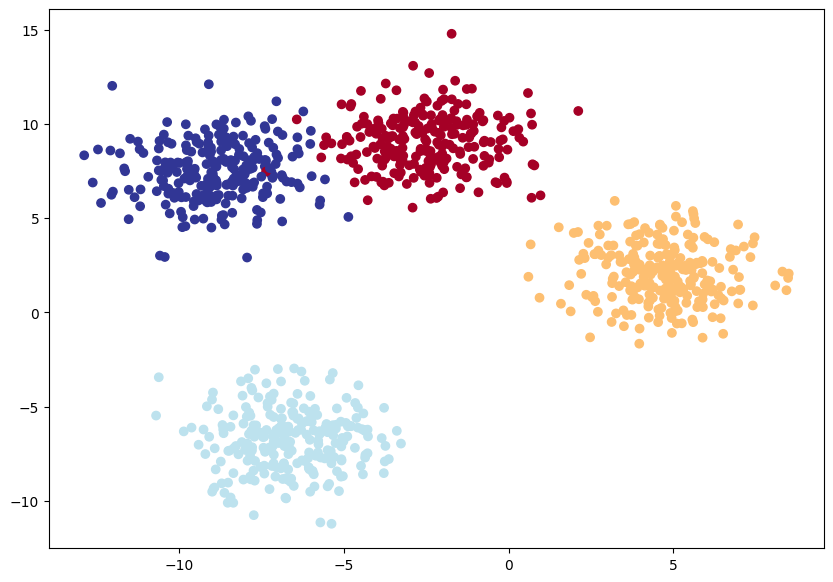

In [59]:
import torch 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

#Set the huperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED =42

# 1. Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5 , # give the clusters a little shakeup
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob  = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) 

# 3. Split into train and test 
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state = RANDOM_SEED)

#4. Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multiclass classifiction model in PyTorch

In [60]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [61]:
# Building a multiclass classification problem
class BlobModel(nn.Module):
    """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        
        Returns:
        
        Example:
        
    """
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features= hidden_units, out_features=output_features)
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)
     
# Create an instance of the model class and send it to the target device
model_4 = BlobModel(input_features=2, output_features= 4, hidden_units= 8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [62]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [63]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [64]:
# Loss fn for multiclass classification 
loss_fn = nn.CrossEntropyLoss()

# create an optimizer 
optimizer = torch.optim.SGD(params= model_4.parameters(), lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our models outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred Probs (use 'torch.softmax()')-> Pred labels (take argmax of the predicition probabilities)

In [65]:
# Lets get some raw outputs for our model (logits)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
    
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [66]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [67]:
# Convert our models logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [68]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [69]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [70]:
# Convert out models prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

### 8.5 Create a training loop and testing loop for a multi-class PyTorch model

In [71]:
# Fit the multiclass model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set number of epochs
epochs = 100

#Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
    ### Training
    model_4.train()
    
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim = 1)
    
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true = y_blob_train, y_pred = y_pred )
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    ### Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim = 1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true = y_blob_test, y_pred=test_pred)
        
    #Print out whats happening
    if epoch % 10 ==0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc : {acc:.2f}% | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.2f}% ")

Epoch: 0 | Loss: 1.1588 | Acc : 40.38% | Test loss: 1.0755 | Test accuracy: 48.00% 
Epoch: 10 | Loss: 0.6448 | Acc : 96.75% | Test loss: 0.6607 | Test accuracy: 97.50% 
Epoch: 20 | Loss: 0.4254 | Acc : 98.50% | Test loss: 0.4307 | Test accuracy: 100.00% 
Epoch: 30 | Loss: 0.2529 | Acc : 99.12% | Test loss: 0.2451 | Test accuracy: 99.50% 
Epoch: 40 | Loss: 0.1123 | Acc : 99.25% | Test loss: 0.1023 | Test accuracy: 99.50% 
Epoch: 50 | Loss: 0.0663 | Acc : 99.25% | Test loss: 0.0585 | Test accuracy: 99.50% 
Epoch: 60 | Loss: 0.0507 | Acc : 99.25% | Test loss: 0.0429 | Test accuracy: 99.50% 
Epoch: 70 | Loss: 0.0430 | Acc : 99.25% | Test loss: 0.0349 | Test accuracy: 99.50% 
Epoch: 80 | Loss: 0.0384 | Acc : 99.25% | Test loss: 0.0299 | Test accuracy: 99.50% 
Epoch: 90 | Loss: 0.0352 | Acc : 99.25% | Test loss: 0.0266 | Test accuracy: 99.50% 


### 8.6 Making and evaluating predictions with a pytorch multi-class model

In [72]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [73]:
y_pred_probs = torch.softmax(y_logits,dim=1)

y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1074e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [74]:
y_preds = torch.argmax(y_pred_probs, dim=1)

print(y_preds[:10])
print(y_blob_test[:10])

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])


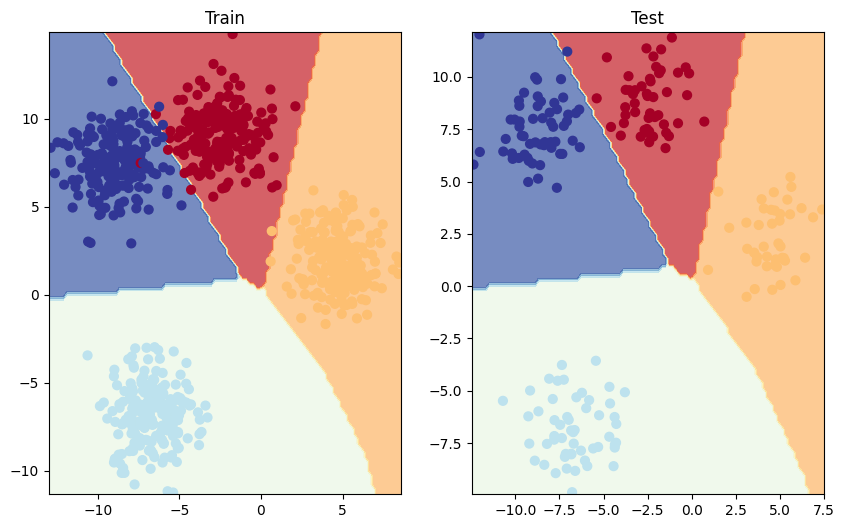

In [75]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics (to evaluate our classification model)

* Accuracy - out of 100 samples how many does our model get right?
* Precision  -  
* Recall - 
* F1-score - 
* Confusion matrix -
* Classification report -

See this article for when to use precision/recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

If you want access to a lot of PyTorch metrics, see TorchMetrics -   https://torchmetrics.readthedocs.io/en/latest/

In [90]:
from torchmetrics import Accuracy

#Setup metric
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate Accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950)

## Exercises and Extra-curriculum 
See exercises and extracurriculum here: https://www.learnpytorch.io/02_pytorch_classification/#exercises
